In [1]:
import pandas as pd

In [7]:
import pandas as pd

try:
    df = pd.read_csv("/content/drive/MyDrive/DACN3/DataCraw/labeled_all.csv", index_col=False, encoding='utf-8')
except UnicodeDecodeError:
    # Try different encodings if UTF-8 fails
    try:
        df = pd.read_csv("/content/drive/MyDrive/DACN3/DataCraw/labeled_all.csv", index_col=False, encoding='latin-1')
        print("File decoded successfully using 'latin-1' encoding.")
    except UnicodeDecodeError:
        try:
            df = pd.read_csv("/content/drive/MyDrive/DACN3/DataCraw/labeled_all.csv", index_col=False, encoding='cp1252')
            print("File decoded successfully using 'cp1252' encoding.")
        except UnicodeDecodeError:
            print("Could not decode the file with common encodings. Please check the file's encoding.")
            raise  # Re-raise the exception if none of the encodings work

File decoded successfully using 'latin-1' encoding.


In [8]:
df.head(10)

,text,sentiment,labels
0,?ây th?c s? là m?t chuy?n ?i tr?i nghi?m tuy?t...,1,['FACILITIES#MISCELLANEOUS']
1,"D?ch v? t?t, ?? ?n ngon, phong c?nh ??p.",1,"['FACILITIES#DESIGN&FEATURES', 'FACILITIES#QUA..."
2,"Khu ngh? d??ng có thi?t k? r?t ??p, m?i phòng ...",1,"['FACILITIES#DESIGN&FEATURES', 'HOTEL#GENERAL'..."
3,Th?t s? ?n t??ng.,1,['HOTEL#GENERAL']
4,M?t k? ngh? khi ???c ghé th?m InterContinental...,1,"['HOTEL#GENERAL', 'HOTEL#MISCELLANEOUS']"
5,"Nhân viên Trang và qu?n lý anh Ph??ng r?t t?t,...",1,"['FACILITIES#QUALITY', 'FOOD&DRINKS#MISCELLANE..."
6,Tôi ???c th? tr?i nghi?m bia ?en t??i Bà Nà r?...,1,"['FACILITIES#MISCELLANEOUS', 'FOOD&DRINKS#MISC..."
7,Không gian t?i Long Bar r?t ??c ?áo và thoáng ...,1,"['FACILITIES#DESIGN&FEATURES', 'FOOD&DRINKS#MI..."
8,Nên ??n tr?i nghi?m th? Intercontinental ?à N?ng,1,['FACILITIES#MISCELLANEOUS']
9,Mình ?ã có 1 tr?i nghi?m ??y ?n t??ng t?i Inte...,1,"['FACILITIES#MISCELLANEOUS', 'HOTEL#COMFORT', ..."


In [ ]:

df = df.drop('JbGkU', axis=1)
# df.head(10)


In [ ]:

df = df.rename(columns={'orRIx': 'text'})



In [ ]:

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(10)


,text
0,Đây thực sự là một chuyến đi trải nghiệm tuyệt...
1,"Nhân viên Trang và quản lý anh Phương rất tốt,..."
2,Mình đã có 1 trải nghiệm đầy ấn tượng tại Inte...
3,Nghỉ dưỡng ở một nơi riêng tư tách biệt hoàn t...
4,Mình đã có một kỳ nghỉ tuyệt vời tại InterCont...
5,"Thiết kế rất đẹp, sang trọng, một nơi rất tốt ..."
6,Gia đình tôi đã có một chuyến đi thật tuyệt vờ...
7,"Đồ ăn ngon, đồ uống thì đa dạng, khu Long Bar ..."
8,InterContinental Danang Sun Peninsula Resort l...
9,"Trải nghiệm dịch vụ , chất lượng trên cả tuyệt..."


In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
sequence_to_classify = """
Tớ ăn cức
"""
candidate_labels = ['positive', 'neutral', 'negative']
classifier(sequence_to_classify, candidate_labels)

{'sequence': '\nTớ ăn cức\n',
 'labels': ['negative', 'neutral', 'positive'],
 'scores': [0.7253428101539612, 0.1812862604856491, 0.09337092190980911]}

In [ ]:
import torch
from transformers import RobertaForSequenceClassification, AutoTokenizer



config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

[[0.001841121818870306, 0.988153874874115, 0.010005025193095207]]


   #    NEG    POS    NEU

In [ ]:

model = RobertaForSequenceClassification.from_pretrained("wonrax/phobert-base-vietnamese-sentiment")

tokenizer = AutoTokenizer.from_pretrained("wonrax/phobert-base-vietnamese-sentiment", use_fast=False)

In [ ]:

# Just like PhoBERT: INPUT TEXT MUST BE ALREADY WORD-SEGMENTED!
sentence = """
Renaissance là một lựa chọn lý tưởng cho những ai muốn tận hưởng kỳ nghỉ thoải mái và tiện nghi. Nằm tại vị trí trung tâm thành phố, khách sạn dễ dàng tiếp cận các điểm tham quan nổi tiếng, quán cà phê, nhà hàng và trung tâm mua sắm. Phòng ở được thiết kế hiện đại, rộng rãi và rất sạch sẽ. Các tiện nghi như TV màn hình phẳng, điều hòa, minibar và wifi miễn phí đều được trang bị đầy đủ, đảm bảo mang đến sự tiện lợi tối đa cho khách lưu trú.Đặc biệt, đội ngũ nhân viên rất nhiệt tình và chuyên nghiệp, luôn sẵn sàng hỗ trợ khi cần thiết. Bữa sáng tại khách sạn cũng rất đáng khen, với nhiều món ăn phong phú và chất lượng. Không gian nhà hàng thoáng đãng và thoải mái, tạo cảm giác dễ chịu khi thưởng thức bữa ăn.
"""

input_ids = torch.tensor([tokenizer.encode(sentence)])

with torch.no_grad():
    out = model(input_ids)
    print(out.logits.softmax(dim=-1).tolist())

[[0.0018704902613535523, 0.9928971529006958, 0.005232381634414196]]


In [ ]:
model = RobertaForSequenceClassification.from_pretrained("wonrax/phobert-base-vietnamese-sentiment")
tokenizer = AutoTokenizer.from_pretrained("wonrax/phobert-base-vietnamese-sentiment", use_fast=False)


In [ ]:
# Tôi sẽ tiếp tục từ đoạn code và yêu cầu của bạn. Dưới đây là code hoàn chỉnh để đọc DataFrame, phân tích sentiment cho cột text bằng mô hình PhoBERT, thêm cột sentiment mới với nhãn (0: tiêu cực, 1: trung tính, 2: tích cực) dựa trên giá trị lớn nhất từ softmax, và trả về chỉ số lớn nhất trong cột sentiment.

# Code hoàn chỉnh:
# python

# Copy
# import pandas as pd
# import torch
# from transformers import RobertaForSequenceClassification, AutoTokenizer
import numpy as np

# Load model và tokenizer


# Hàm phân tích sentiment với xử lý NaN
def get_sentiment(text):
    # Kiểm tra nếu text là NaN hoặc không phải chuỗi
    if not isinstance(text, str) or pd.isna(text):
        return -1  # Gán giá trị đặc biệt cho NaN (hoặc bạn có thể chọn giá trị khác)

    # Mã hóa câu
    input_ids = torch.tensor([tokenizer.encode(text, truncation=True, max_length=256)])

    with torch.no_grad():
        out = model(input_ids)
        # Lấy xác suất từ softmax
        probs = out.logits.softmax(dim=-1).tolist()[0]
        # Trả về nhãn có xác suất cao nhất (0: tiêu cực, 1: tich cuc, 2: trung tinh)
        return np.argmax(probs)

# Xử lý giá trị NaN trong cột text (tùy chọn: thay NaN bằng chuỗi rỗng)
# df['text'] = df['text'].fillna('')  # Thay NaN bằng chuỗi rỗng nếu muốn

# Áp dụng hàm get_sentiment cho cột text và tạo cột sentiment mới
df['sentiment'] = df['text'].apply(get_sentiment)

sentiment
 1    696
 2      3
 0      3
-1      2
Name: count, dtype: int64


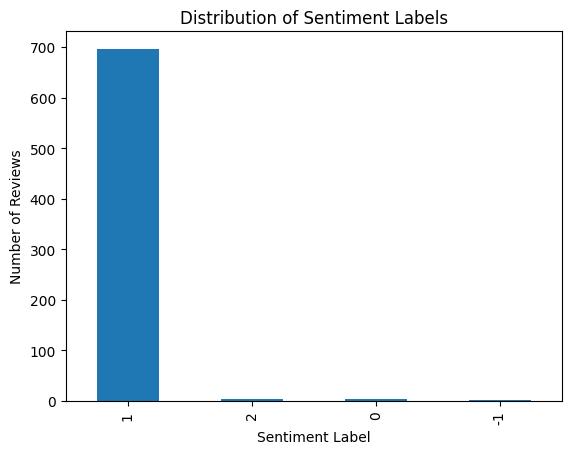

In [ ]:
# prompt: phân phối các giá trị trong cột sentiment

# Display the distribution of values in the 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# You can also visualize the distribution using a bar plot
import matplotlib.pyplot as plt
sentiment_counts.plot(kind='bar')
plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Sentiment Labels")
plt.show()


In [ ]:
df.to_csv("/content/drive/MyDrive/DACN3/DataSentimentLabeled/intercom.csv", index=False)

In [ ]:
df.head(10)

,text,sentiment
0,Đây thực sự là một chuyến đi trải nghiệm tuyệt...,1
1,"Nhân viên Trang và quản lý anh Phương rất tốt,...",1
2,Mình đã có 1 trải nghiệm đầy ấn tượng tại Inte...,1
3,Nghỉ dưỡng ở một nơi riêng tư tách biệt hoàn t...,1
4,Mình đã có một kỳ nghỉ tuyệt vời tại InterCont...,1
5,"Thiết kế rất đẹp, sang trọng, một nơi rất tốt ...",1
6,Gia đình tôi đã có một chuyến đi thật tuyệt vờ...,1
7,"Đồ ăn ngon, đồ uống thì đa dạng, khu Long Bar ...",1
8,InterContinental Danang Sun Peninsula Resort l...,1
9,"Trải nghiệm dịch vụ , chất lượng trên cả tuyệt...",1
